In [17]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from lib_old import load_curvecurator, fit, plot_fit, plot_fit_type

In [18]:
palette = sns.color_palette("tab10")
palette = {
    "Target": palette[0],
    "Off-target": palette[1],
    "Both": palette[2],
}

# Load data

Text(0.5, 1.0, 'Tipifarnib')

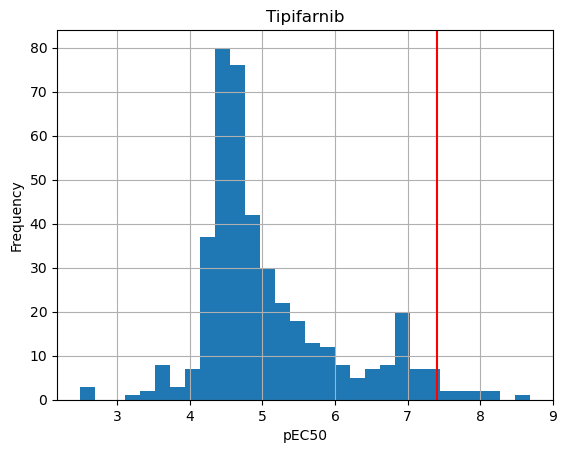

In [19]:
drugs = {
    "Afatinib": {
        'identifier': "10184653/2reps_only",
        'target_ec50_nm': 3,
    },
    "Lapatinib": {
        "identifier": "208908",
        "target_ec50_nm": 65,
    },
    "PF-3758309": {
        "identifier": "25227462",
        'target_ec50_nm': 3,
    },
    "Dasatinib": {
        "identifier": "3062316",
        'target_ec50_nm': 5,
    },
    "92131101": {
        "identifier": "92131101",
        'target_ec50_nm': 10,
    },
    "Tipifarnib": {
        "identifier": "159324",
        'target_ec50_nm': 40,
    },
    "Docetaxel": {
        "identifier": "9877265",
        'target_ec50_nm': 50,
    },
    "168312962": {
        "identifier": "168312962",
        'target_ec50_nm': 40,
    },
    "Selumetinib": {
        "identifier": "10127622",
        'target_ec50_nm': 200,
    },
    "11364421": {
        "identifier": "11364421",
        'target_ec50_nm': 8,
    },
    "Bleomycin": {
        "identifier": "46930982",
        'target_ec50_nm': 50,
    },
    "Alisertib": {
        "identifier": "24771867",
        'target_ec50_nm': 30,
    },
    "Oligomycin A": {
        "identifier": "6364620",
        'target_ec50_nm': 30,
    },
    "Trametinib": {
        "identifier": "11707110",
        'target_ec50_nm': 20,
    },
    "Leptomycin B": {
        "identifier": "6917907",
        'target_ec50_nm': 30,
    },
    "Vincristine": {
        "identifier": "5388993",
        'target_ec50_nm': 100,
    },
    "Idelalisib": {
        "identifier": "11625818",
        'target_ec50_nm': 80,
    },
    "Rapamycin": {
        "identifier": "5284616",
        'target_ec50_nm': 30,
    },
}

drug = "Tipifarnib"

df_curvecurator, df_doses = load_curvecurator(drugs[drug]['identifier'])
target_ec50_µm = drugs[drug]['target_ec50_nm'] / 1e3

df_curvecurator["pEC50"].hist(bins=30)
plt.axvline(-np.log10(target_ec50_µm)+6, color="red") # +6 because the EC50 is in µM and the pEC50 requires M
# Set x-axis label
plt.xlabel("pEC50")
# Set y-axis label
plt.ylabel("Frequency")
plt.title(drug)

# Analyze data

In [20]:
df_curvecurator = fit(df_curvecurator, df_doses, target_ec50_μm)

/cmnfs/proj/sysbiomed24/task-1/02_sigmoid-fitting/../lib.py:131: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_pos, _ = curve_fit(__double_logistic__, x, y,
/cmnfs/proj/sysbiomed24/task-1/02_sigmoid-fitting/../lib.py:141: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_neg, _ = curve_fit(__double_logistic__, x, y,


## Investigate fit distributions

In [21]:
#https://stackoverflow.com/a/71515035/2901002
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

Text(0.5, 0.98, 'Tipifarnib')

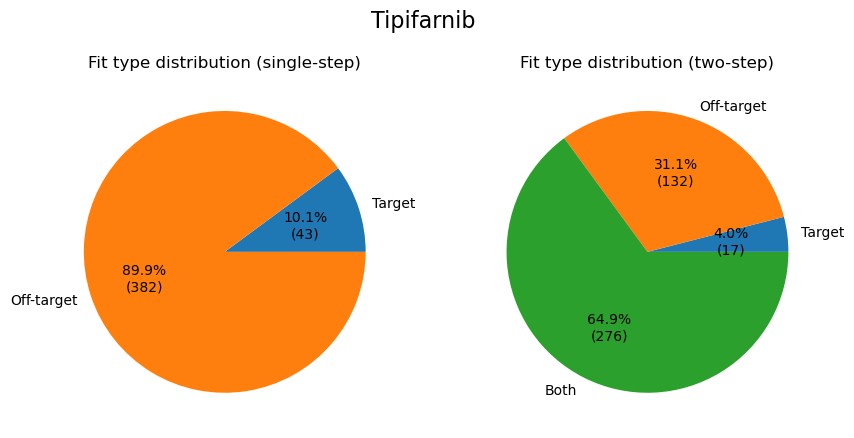

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

counts = df_curvecurator["single_step_is_target"].value_counts()
counts.index = counts.index.map({True: "Target", False: "Off-target"})
cols = ["Target", "Off-target"]
counts = counts.loc[cols]
counts.plot.pie(autopct=autopct_format(counts), title="Fit type distribution (single-step)", ax=axs[0], colors=[palette[col] for col in cols])

# Show absolute values
counts = df_curvecurator["Fit type"].value_counts()
cols = ["Target", "Off-target", "Both"]
counts = counts.loc[cols]
counts.plot.pie(autopct=autopct_format(counts), title="Fit type distribution (two-step)", ax=axs[1], colors=[palette[col] for col in cols])

for ax in axs:
    # Remove y-axis label
    ax.set_ylabel('')

# Set global title
plt.suptitle(drug, fontsize=16)

<Axes: xlabel='pEC50', ylabel='Count'>

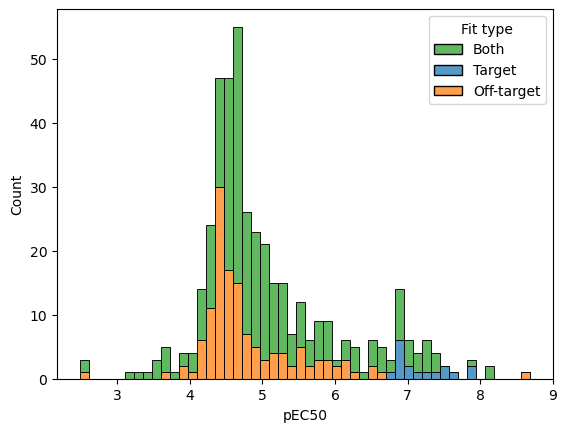

In [23]:
sns.histplot(df_curvecurator, x="pEC50", hue="Fit type", bins=50, multiple="stack", palette=palette)

<Axes: xlabel='target_effect_size', ylabel='Count'>

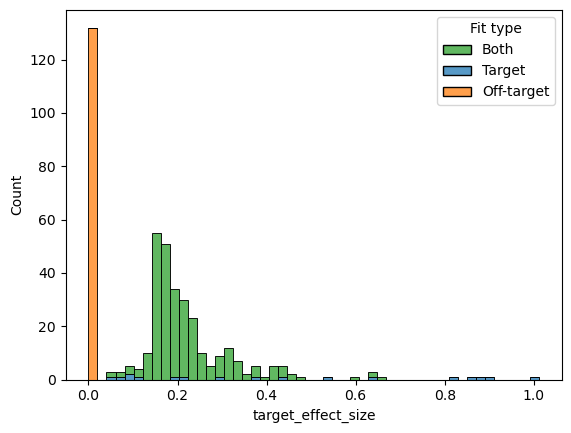

In [24]:
sns.histplot(df_curvecurator, x="target_effect_size", hue="Fit type", bins=50, multiple="stack", palette=palette)

## Investigate interesting cell lines

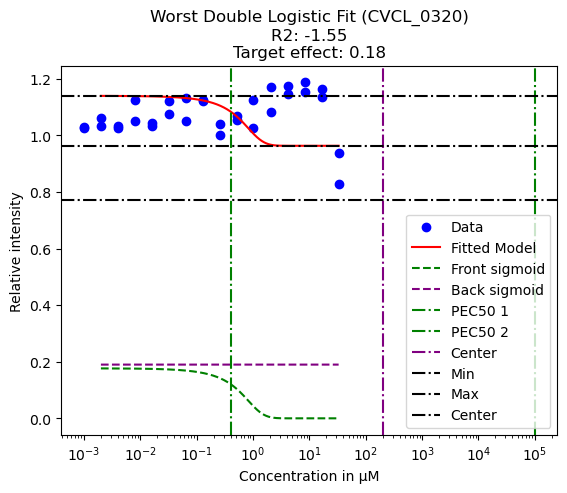

Front: 1.21, Middle: 0.97, Back: 0.77, PEC50 1: 0.40, PEC50 2: 100000.40, Slope 1: 2.50, Slope 2: 0.00


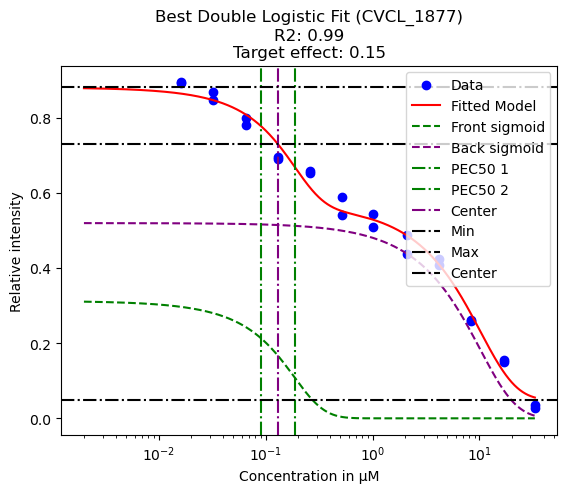

Front: 1.50, Middle: 1.07, Back: 0.05, PEC50 1: 0.09, PEC50 2: 0.19, Slope 1: 11.12, Slope 2: 0.15


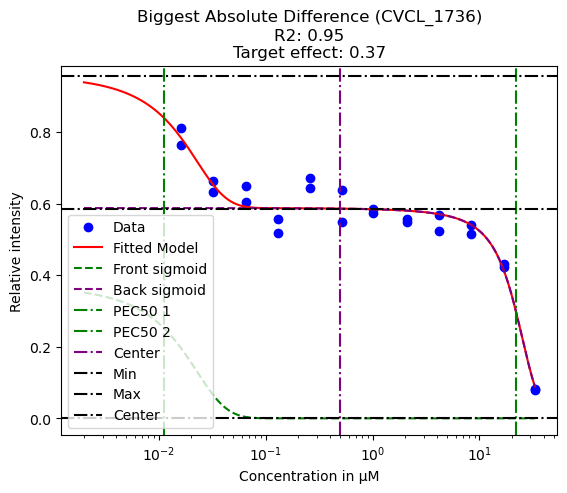

Front: 1.11, Middle: 0.61, Back: 0.00, PEC50 1: 0.01, PEC50 2: 21.76, Slope 1: 90.00, Slope 2: 0.16


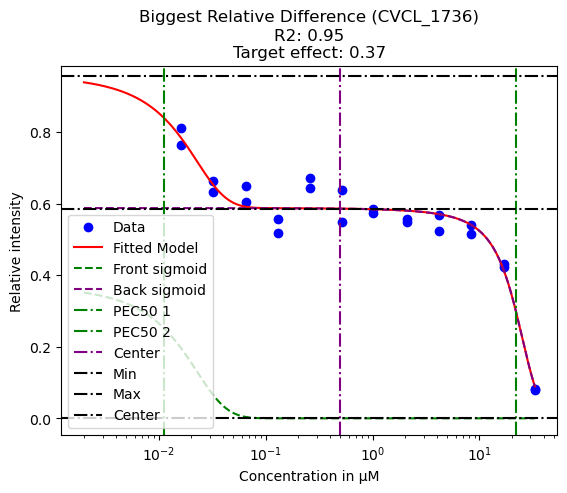

Front: 1.11, Middle: 0.61, Back: 0.00, PEC50 1: 0.01, PEC50 2: 21.76, Slope 1: 90.00, Slope 2: 0.16


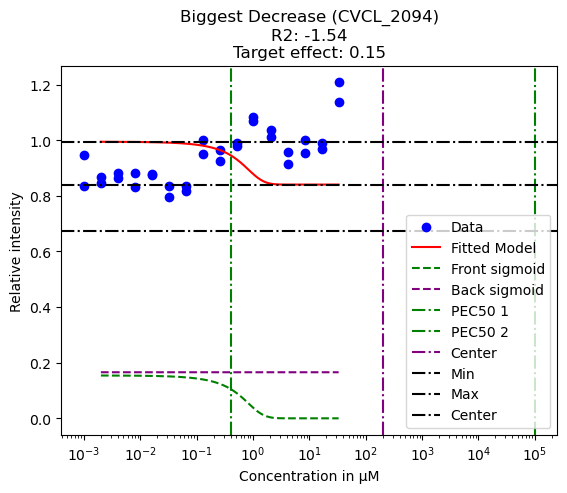

Front: 1.05, Middle: 0.84, Back: 0.67, PEC50 1: 0.40, PEC50 2: 100000.40, Slope 1: 2.50, Slope 2: 0.00


In [25]:
worst_single = df_curvecurator["single_r2"].idxmin()
best_single = df_curvecurator["single_r2"].idxmax()
worst_double = df_curvecurator["double_r2"].idxmin()
best_double = df_curvecurator["double_r2"].idxmax()
largest_diff_abs = df_curvecurator["sigmoid_diff"].idxmax()
largest_dec_abs = df_curvecurator["sigmoid_diff"].idxmin()
largest_diff_rel = (df_curvecurator["sigmoid_diff"] / df_curvecurator["single_r2"]).idxmax()

plot_fit(df_curvecurator, df_doses, worst_double, title=f'Worst Double Logistic Fit ({worst_double})')
plot_fit(df_curvecurator, df_doses, best_double, title=f'Best Double Logistic Fit ({best_double})')
plot_fit(df_curvecurator, df_doses, largest_diff_abs, title=f'Biggest Absolute Difference ({largest_diff_abs})')
plot_fit(df_curvecurator, df_doses, largest_diff_rel, title=f'Biggest Relative Difference ({largest_diff_rel})')
plot_fit(df_curvecurator, df_doses, largest_dec_abs, title=f'Biggest Decrease ({largest_dec_abs})')

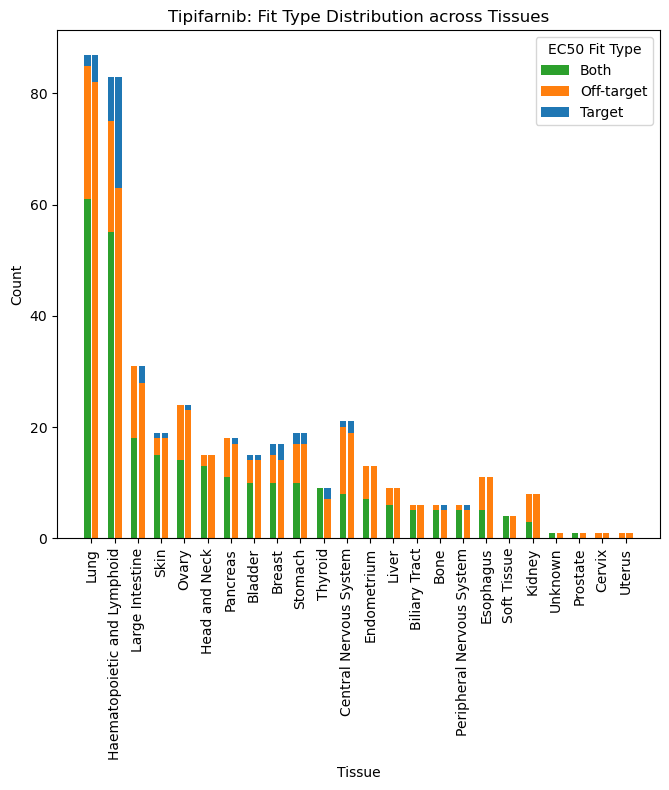

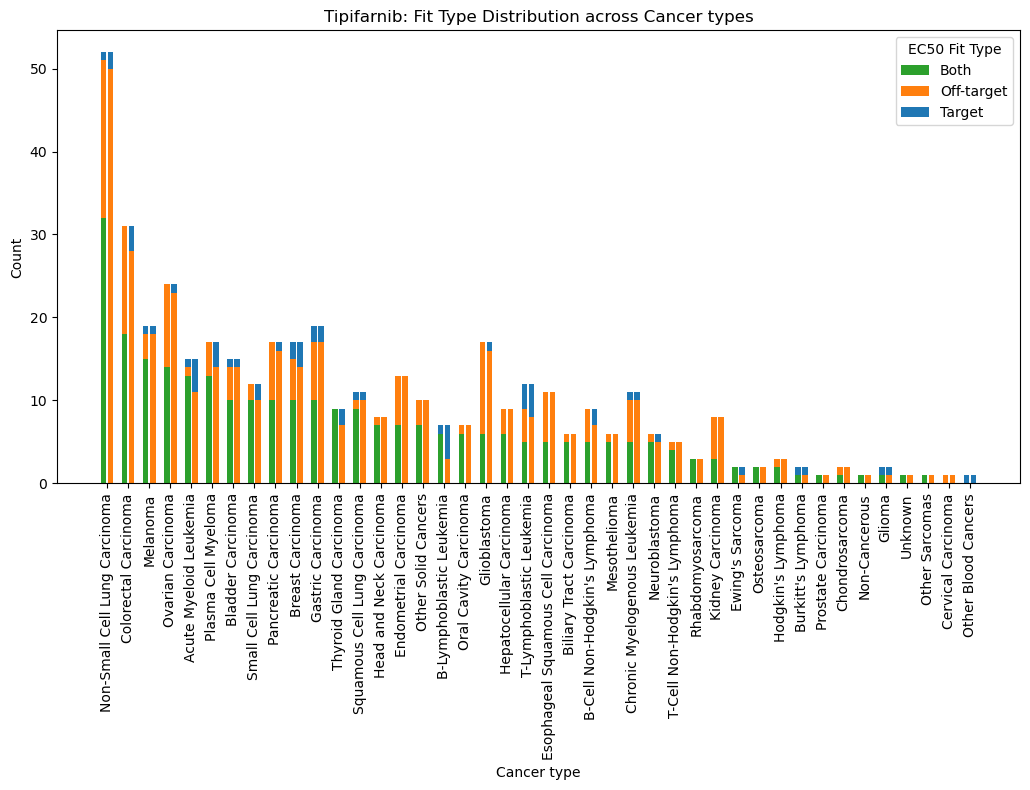

In [26]:
for category in ["tissue", "cancer_type"]:
    plot_fit_type(df_curvecurator, category, drug, palette)

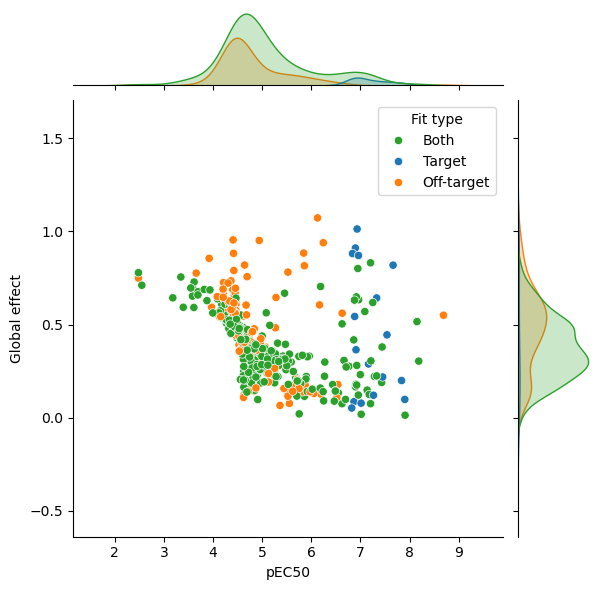

In [27]:
sns.jointplot(data=df_curvecurator, x="pEC50", y="Global effect", hue="Fit type", palette=palette)

# Comparison with another drug

In [28]:
other_drug = "Lapatinib"
target_ec50_μm_other = drugs[other_drug]['target_ec50_nm'] / 1e3
df_curvecurator_other, df_doses_other = load_curvecurator(drugs[other_drug]['identifier'])

In [29]:
df_curvecurator_other = fit(df_curvecurator_other, df_doses_other, target_ec50_µm_other)

In [30]:
intersection = df_curvecurator.index.intersection(df_curvecurator_other.index)
intersection

Index(['CVCL_0001', 'CVCL_0005', 'CVCL_0006', 'CVCL_0007', 'CVCL_0009',
       'CVCL_0014', 'CVCL_0022', 'CVCL_0023', 'CVCL_0027', 'CVCL_0030',
       ...
       'CVCL_8930', 'CVCL_A341', 'CVCL_A351', 'CVCL_A352', 'CVCL_A637',
       'CVCL_H525', 'CVCL_L079', 'CVCL_L083', 'CVCL_L085', 'CVCL_S641'],
      dtype='object', length=385)

In [31]:
df_curvecurator = df_curvecurator.loc[intersection]
df_curvecurator_other = df_curvecurator_other.loc[intersection]

Text(0.5, 0.98, 'Effect size: Tipifarnib vs Lapatinib')

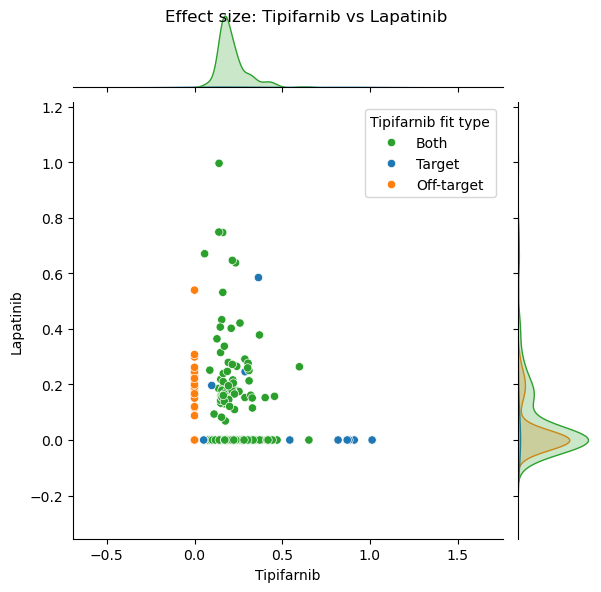

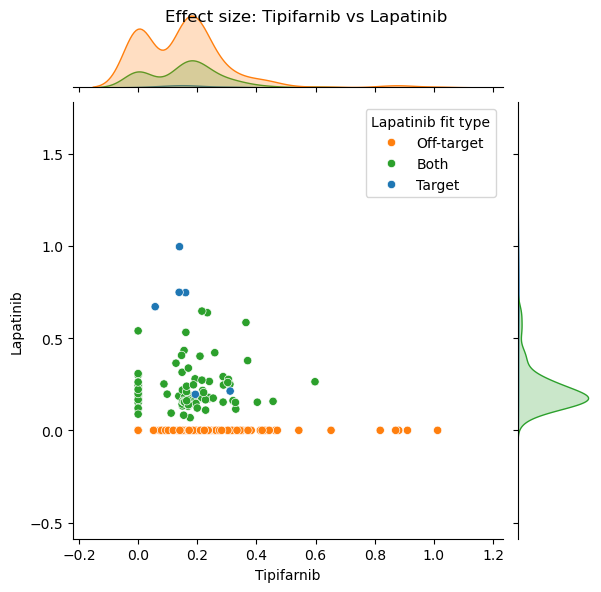

In [32]:
df_correlation = pd.DataFrame({
    drug: df_curvecurator.loc[intersection, "target_effect_size"],
    other_drug: df_curvecurator_other.loc[intersection, "target_effect_size"],
    f"{drug} fit type": df_curvecurator.loc[intersection, "Fit type"],
    f"{other_drug} fit type": df_curvecurator_other.loc[intersection, "Fit type"],
})

sns.jointplot(data=df_correlation, x=drug, y=other_drug, hue=f"{drug} fit type", palette=palette)
plt.suptitle(f"Effect size: {drug} vs {other_drug}")
sns.jointplot(data=df_correlation, x=drug, y=other_drug, hue=f"{other_drug} fit type", palette=palette)
plt.suptitle(f"Effect size: {drug} vs {other_drug}")